# Introducción

El objetivo de esta práctica es mostrar al alumno las posibilidades que ofrece R para analizar datos de distintas fuentes diferentes, extraer datos, comparar, hacer gráficas y sacar estadísticos.

Las fuentes de datos que se tienen son:
* Datos meteorológicos de Praga de 1775 hasta 2004: https://www.ncdc.noaa.gov/cdo-web/datasets
* Banco mundial: https://data.worldbank.org/topic/climate-change
* Nivel de CO2 en la atmósfera (Mauna Loa): https://www.esrl.noaa.gov/gmd/ccgg/trends/data.html

Todos los ficheros necesarios para resolver la práctica se ofrecen como adjuntos.

## Datos meteorológicos NOAA

Carga el tiempo meteorológico de Praga en un data.frame. Fichero: *EZE00100082*

In [20]:
weatherPraga<-read.csv("./datos/EZE00100082.csv", sep = ",")

Mostrar los 10 años que más precipitiaciones han tenido junto con su valor correspondiente (columna PRCP):

In [21]:
#Nos quedamos con las columnas años y precipitaciones
weatherPraga2<-weatherPraga[,c("DATE","PRCP")]
#Ordenamos por PRCP y obtenemos los 10 mayores
weatherPraga2[order(-weatherPraga2$PRCP),][1:10,]

,DATE,PRCP
165,1939,745.5
54,1828,665.4
228,2002,661.5
172,1946,638.3
116,1890,637.3
63,1837,634.9
184,1958,633.1
57,1831,625.7
192,1966,624.1
55,1829,622.4


* Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
* Crear una regresión lineal (polinomio orden 1) que muestre la tendencia. Pintarla sobre el diagrama de dispersión.
* En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la  regresión lineal)

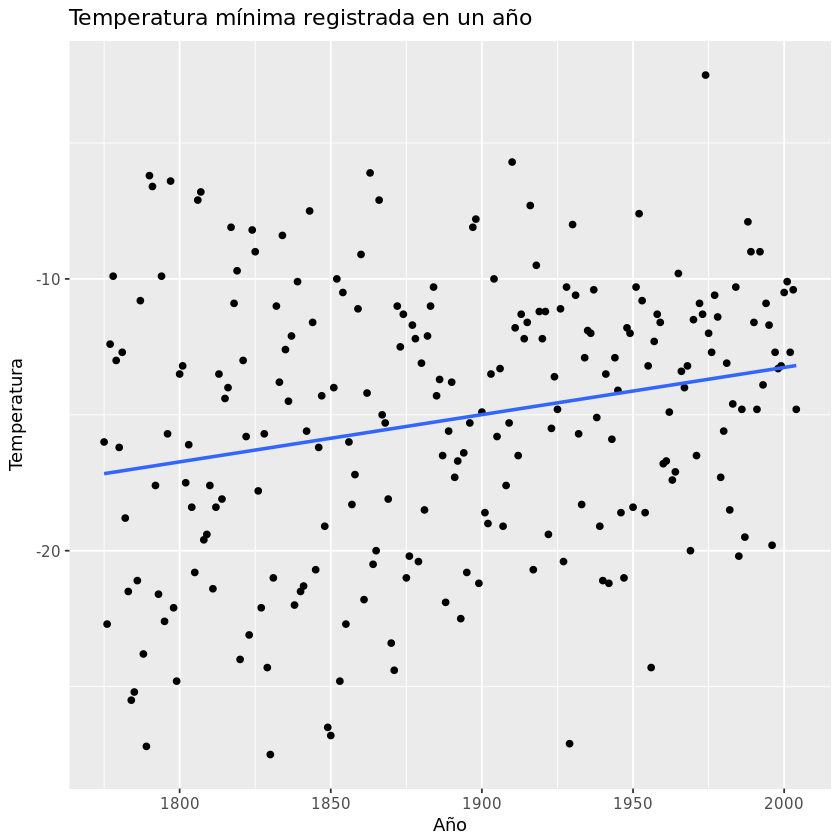

In [22]:
#Muestra en un diagrama de dispersión la temperatura mínima registrada en un año (columna EMNT) en función del año registrado (columna DATE).
library("ggplot2")
weatherPragaEj2<-read.csv("./datos/EZE00100082.csv", sep = ",")
ejDispersion<-weatherPragaEj2[,c("DATE","EMNT")]

ggplot(data=ejDispersion, aes(x=DATE,y=EMNT)) + geom_point() + xlab ("Año") + ylab("Temperatura") + ggtitle ("Temperatura mínima registrada en un año") + geom_smooth(method = "lm", se = FALSE)

In [2]:
#En media, ¿Cuantos grados ha aumentado la temperatura mínima cada año? (pendiente de la regresión lineal)
library("ggplot2")
weatherPragaEj2<-read.csv("./datos/EZE00100082.csv", sep = ",")
ejDispersion<-weatherPragaEj2[,c("DATE","EMNT")]

pendienteRegresionLineal=cov(ejDispersion$DATE, ejDispersion$EMNT)/var(ejDispersion$DATE)
print(paste0("La temperatura mínima ha aumentado: ", pendienteRegresionLineal))

[1] "La temperatura mínima ha aumentado: 0.0173750305134395"


¿Ha subido realmente la temperatura mínima?
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
* Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
* ¿Cual es la diferencia entre ambos? ¿Es estadísticamente significativa?
  * Nota: antes de aplicar un test estadístico hay que ver si cumple con los requisitos de ese test.

In [13]:
#Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1775,1794]
weatherPragaTempMin<-read.csv("./datos/EZE00100082.csv", sep = ",")
tempMinGrupo1<-weatherPragaTempMin[,c("DATE","EMNT")]
tempMinGrupo1 = tempMinGrupo1[1:20,]
print(paste0("La media aritmética de las temperaturas es: ",
             round(mean(tempMinGrupo1$EMNT),2),"%"))

[1] "La media aritmética de las temperaturas es: -16.93%"


In [14]:
#Calcula la media de la temperatura mínima (columna EMNT) del intervalo de años [1985,2004]
weatherPragaTempMin<-read.csv("./datos/EZE00100082.csv", sep = ",")
tempMinGrupo2<-weatherPragaTempMin[,c("DATE","EMNT")]
tempMinGrupo2 = tempMinGrupo2[tempMinGrupo2$DATE>1984,]
print(paste0("La media aritmética de las temperaturas es: ",
             round(mean(tempMinGrupo2$EMNT),2),"%"))

[1] "La media aritmética de las temperaturas es: -13.04%"


## Datos banco mundial

Carga los datos del banco mundial

In [1]:
databank<-read.csv("./datos/API_19_DS2_en_csv_v2.csv",skip=4)
#Borramos las X del nombre de la columna
colnames(databank)<-gsub("X","",colnames(databank))

countryData<-read.csv("./datos/Metadata_Country_API_19_DS2_en_csv_v2.csv")

# De esta forma podremos aceder a la información de paises usando su countryCode
rownames(countryData)<-countryData$Country.Code

realCountryData<-subset(countryData,IncomeGroup!="")
regionData<-subset(countryData,IncomeGroup=="")
print(paste("Tenemos un total de",nrow(realCountryData),"paises"))
print(paste("Tenemos un total de",nrow(regionData),"regiones"))
indicators<-read.csv("./datos/Metadata_Indicator_API_19_DS2_en_csv_v2.csv")
print(paste("Tenemos un total de",nrow(indicators),"indicadores"))

[1] "Tenemos un total de 217 paises"
[1] "Tenemos un total de 46 regiones"
[1] "Tenemos un total de 80 indicadores"


¿Cual fue el país que más toneladas de CO2 equivalente emitió en 1970 (Mostrar *Country.Name*)?
¿Cuanto contaminó?

Hay una dataframe con la lista de pasises en *realCountryData*
El número de toneladas de CO2 equivalente viene dado por el Indicator.Code *"EN.ATM.GHGT.KT.CE"*


In [76]:
#databank => países
#realCountryData => países
#regionData => regiones
#indicators => indicadores

realCountryData<-subset(countryData,Region!="") #Nos quedamos solo con los países. Son aquellos que NO tienen el campo región vacío
names(realCountryData) <- c("Country.Code", "Region", "IncomeGroup", "SpecialNotes", "TableName") # Ponemos nombres a las columnas
paisesRegiones<-realCountryData[,c("Country.Code", "Region")] # Nos quedamos con los países y la región
#paisesRegiones

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1970")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.GHGT.KT.CE', ] # Filtramos por el indicador

solucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas
solucion[order(-solucion$'1970'),][1,] # Seleccionamos los 10 primeros según volumen columna 1970

,Country.Code,Region,Country.Name,Indicator.Code,1970
204,USA,North America,United States,EN.ATM.GHGT.KT.CE,5400504


¿Cuales fueron los 5 países que más toneladas de CO2 equivalente emitieron en 2012? ¿Cuantas kt emitieron?

In [42]:
tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "2012")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.GHGT.KT.CE', ] # Filtramos por el indicador

solucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas
solucion[order(-solucion$'2012'),][1:5,] # Seleccionamos los 10 primeros según volumen columna 1970

,Country.Code,Region,Country.Name,Indicator.Code,2012
37,CHN,East Asia & Pacific,China,EN.ATM.GHGT.KT.CE,12454711
204,USA,North America,United States,EN.ATM.GHGT.KT.CE,6343841
90,IND,South Asia,India,EN.ATM.GHGT.KT.CE,3002895
27,BRA,Latin America & Caribbean,Brazil,EN.ATM.GHGT.KT.CE,2989418
166,RUS,Europe & Central Asia,Russian Federation,EN.ATM.GHGT.KT.CE,2803398


¿Cual ha sido la media del **porcentaje** de crecimiento de las emisiones de CO2 equivalente en China desde 2000 hasta 2012?

In [57]:
tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "2000":"2012")] # Seleccionamos consultas que nos interesan

productores<-tempProductores[tempProductores$Country.Code == 'CHN' & tempProductores$Indicator.Code == 'EN.ATM.GHGT.KT.CE', ] # Filtramos por el indicador y por el códido de país de China
product<-productores[,4:16] # nos quedamos con los años
product<-t(product) # ponemos transpuesta para cambiar filas por columnas
colnames(product)[1] <- paste0("emisionesCO2") # cambiamos el nombre de la columna

myGeometricMean<-function(X,na.rm=F){
    if (na.rm){
        X<-na.omit(X)
    }
    m<-1
    for (xi in X){
        m<-m*xi        
    }
    m^(1/length(X))
}

temp=as.data.frame(product) #lo pasamos a dataframe para poder realizar el cálculo.
mediaPorcentaje<-(myGeometricMean(temp$emisionesCO2,na.rm=T)-1)*100
print(paste0("La media geométrica es:", round(mediaPorcentaje,2),"%"))

[1] "La media geom<U+00E9>trica es:814335528.49%"


Compara las emisiones de CO2(kt) per cápita (clave en Indicator.Code: *EN.ATM.CO2E.PC*) de todos los paises en 1960,1990 y 2017 mediante:
* diagrama de cajas
* histograma
* curvas de densidad

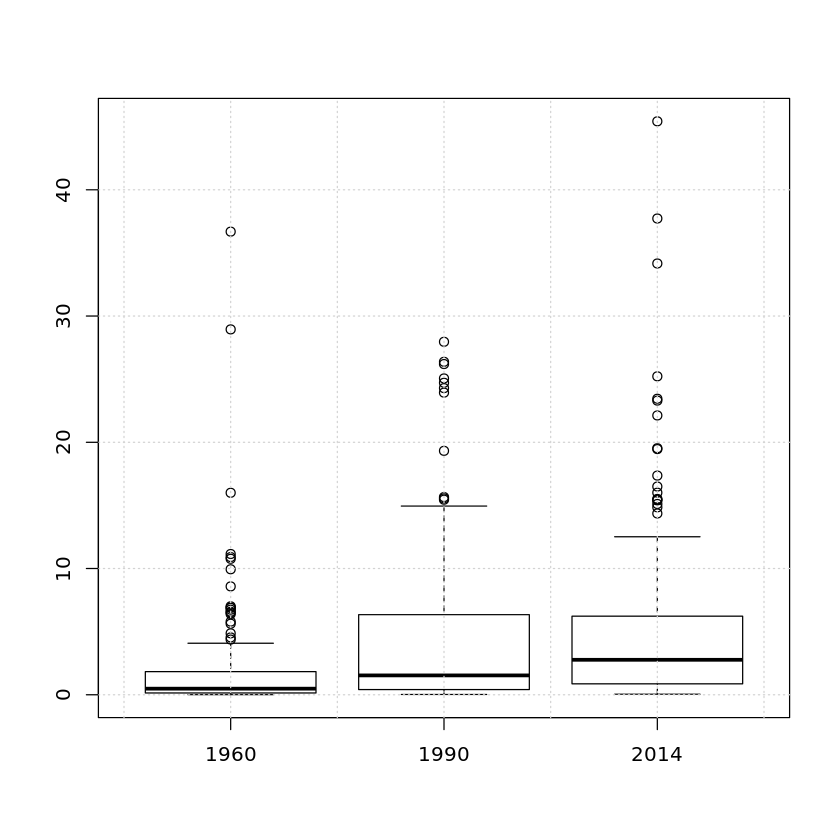

In [58]:
#Diagrama de cajas:

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960", "1990", "2014")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.CO2E.PC', ] # Filtramos por el indicador y por el códido de país de China

tmpSolucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas
solucion<-tmpSolucion[,c("Country.Name", "Country.Code", "Indicator.Code", "1960", "1990", "2014")]

boxplot(solucion[, 4:6], c("1960", "1990", "2014"))
grid()

Loading required package: ggplot2


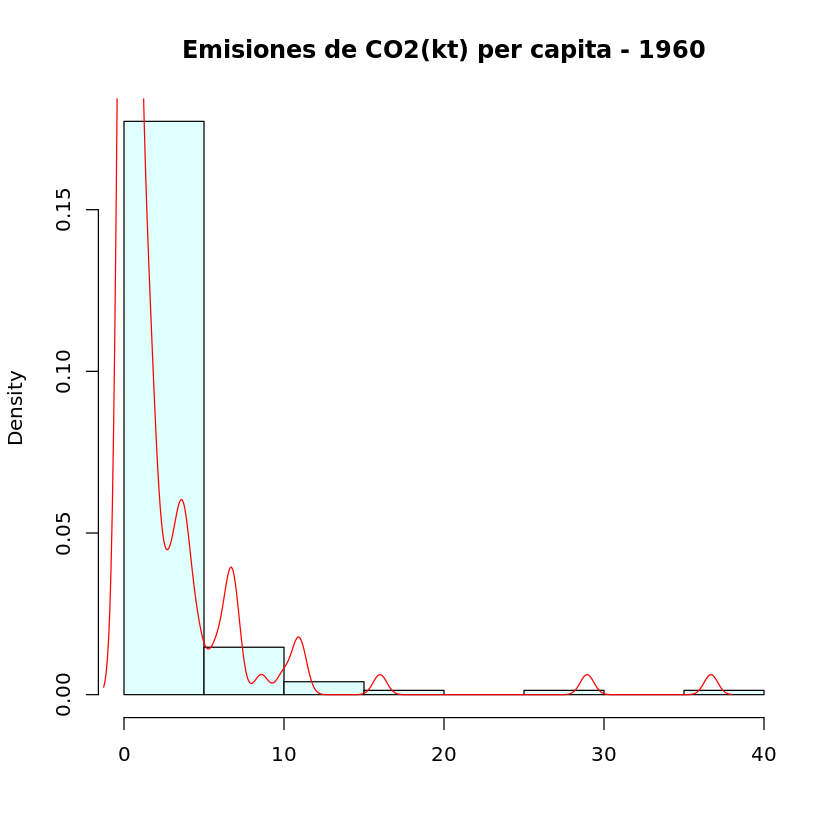

In [59]:
###### Histograma 1960

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960", "1990", "2014")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.CO2E.PC', ] # Filtramos por el indicador y por el códido de país de China
tmpSolucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas

solucion<-tmpSolucion[,c("1960", "1990", "2014")]
solucionNorm<-solucion[complete.cases(solucion), ] # Quitamos NA

require(ggplot2)
hist(solucionNorm$"1960",freq=FALSE,col="lightcyan", main="Emisiones de CO2(kt) per capita - 1960", xlab="")

lines(density(solucionNorm$"1960"), col = "red")

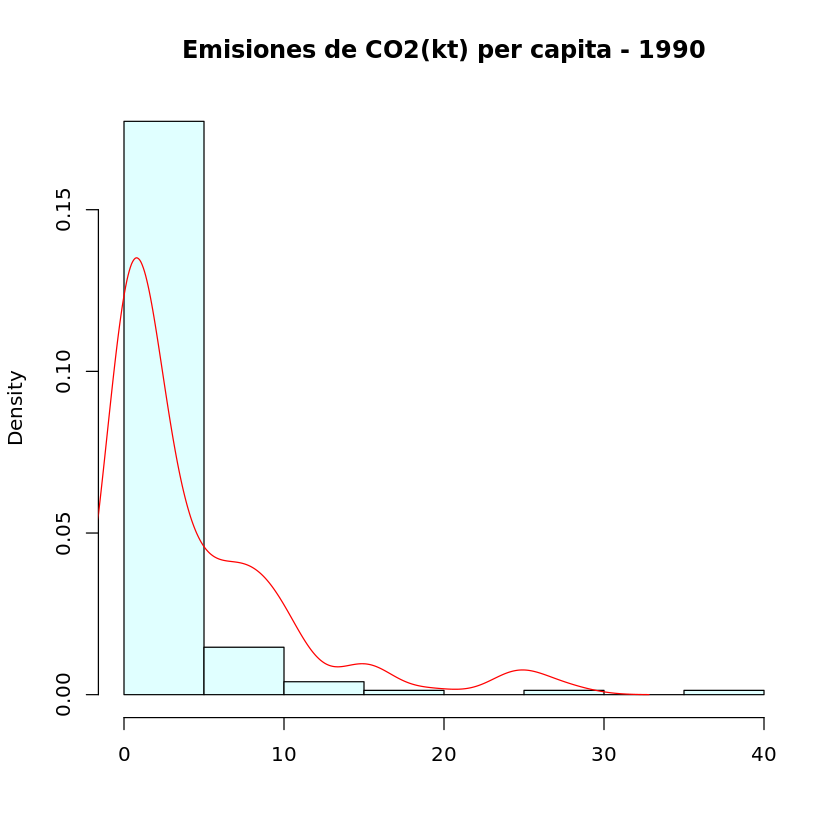

In [60]:
###### Histograma 1990

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960", "1990", "2014")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.CO2E.PC', ] # Filtramos por el indicador y por el códido de país de China
tmpSolucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas

solucion<-tmpSolucion[,c("1960", "1990", "2014")]
solucionNorm<-solucion[complete.cases(solucion), ] # Quitamos NA

require(ggplot2)
hist(solucionNorm$"1960",freq=FALSE,col="lightcyan", main="Emisiones de CO2(kt) per capita - 1990", xlab="")

lines(density(solucionNorm$"1990"), col = "red")

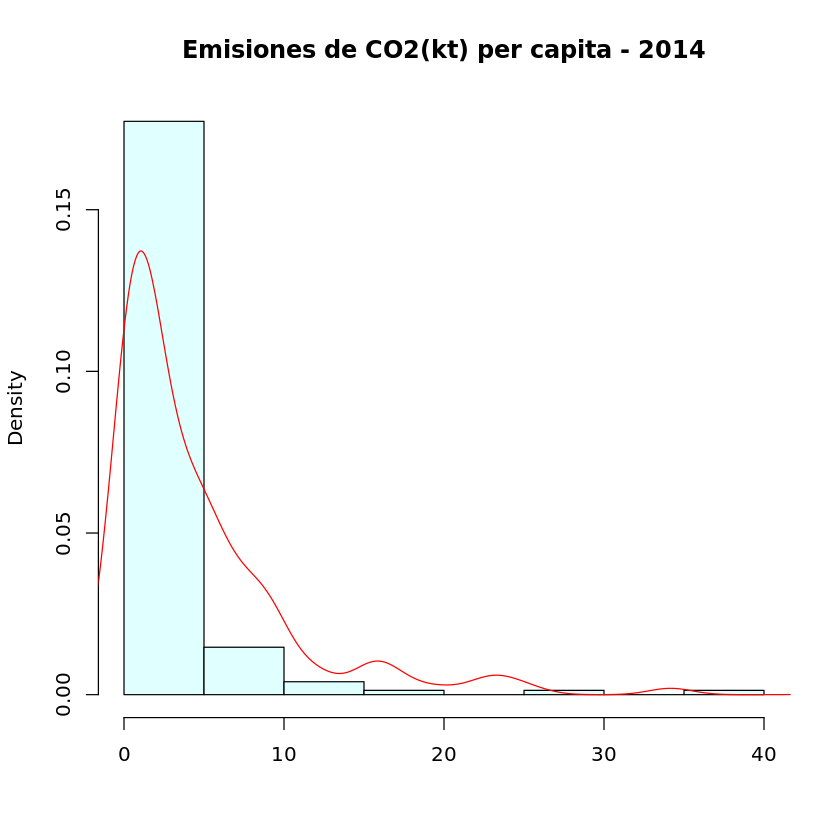

In [61]:
###### Histograma 2014

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960", "1990", "2014")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.CO2E.PC', ] # Filtramos por el indicador y por el códido de país de China
tmpSolucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas

#solucion<-tmpSolucion[,c("Country.Name", "Country.Code", "Indicator.Code", "1960", "1990", "2014")]
solucion<-tmpSolucion[,c("1960", "1990", "2014")]
solucionNorm<-solucion[complete.cases(solucion), ] # Quitamos NA

require(ggplot2)
hist(solucionNorm$"1960",freq=FALSE,col="lightcyan", main="Emisiones de CO2(kt) per capita - 2014", xlab="")

lines(density(solucionNorm$"2014"), col = "red")

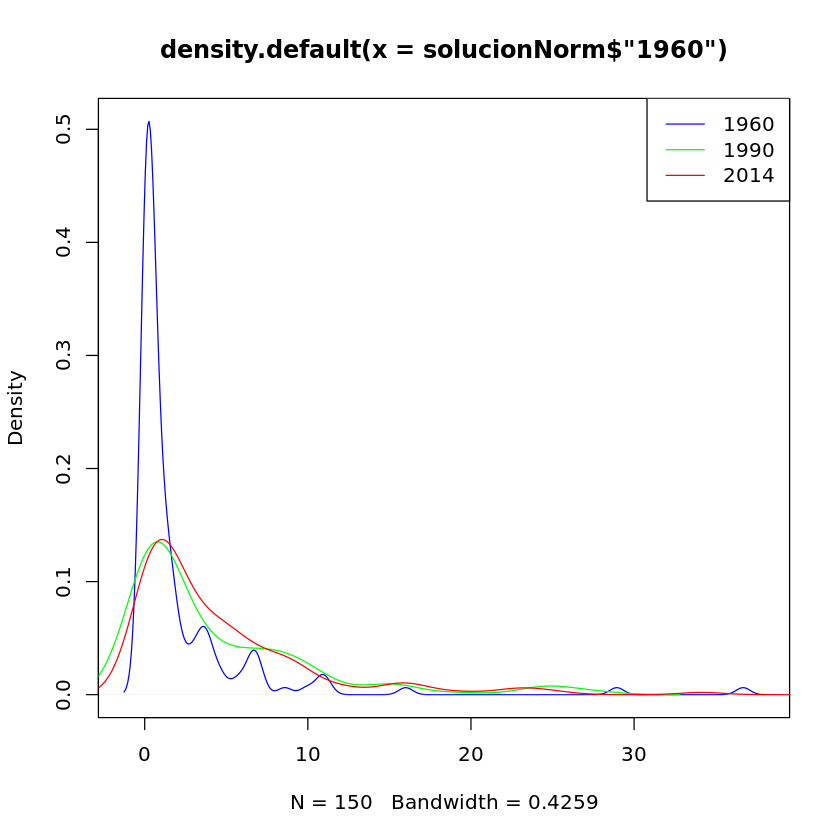

In [62]:
# Comparativa curvas de densidad
plot(density(solucionNorm$"1960"), col = "blue")
lines(density(solucionNorm$"1990"), col = "green")
lines(density(solucionNorm$"2014"), col = "red")

legend("topright", c("1960", "1990", "2014"), lty = 1, col = c("blue", "green", "red"))

Utilizando ggplot: Compara en una gráfica las emisiones totales de CO2(kt) en función del año de las siguientes regiones:
* Mundo entero: WLD
* Unión europea: EUU
* Africa subsahariana: SSA
* Norteamérica: NAC
* Este de Asia y pacífico: TEA

Ayuda: Tendrás que usar la función *melt()* para transformar los años, cada año en una columna, en un data.frame donde cada uno esté en una fila.

Using Country.Code, Region, Country.Name, Indicator.Code as id variables


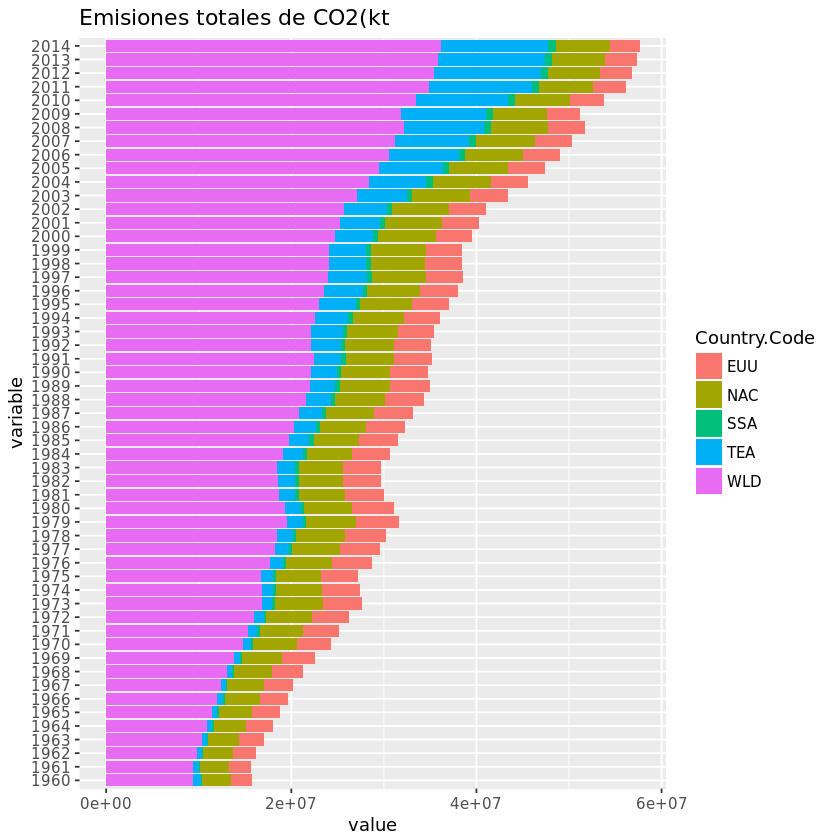

In [64]:
realCountryData<-subset(countryData,Region=="") #Nos quedamos solo con las regiones. Son aquellos que tienen el campo región vacío
names(realCountryData) <- c("Country.Code", "Region", "IncomeGroup", "SpecialNotes", "TableName") # Ponemos nombres a las columnas
paisesRegiones<-realCountryData[,c("Country.Code", "Region")] # Nos quedamos con los países y la región

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960":"2014")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.CO2E.KT', ] # Filtramos por el indicador

tmpSolucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas
solucion<-tmpSolucion[tmpSolucion$Country.Code == "WLD" | tmpSolucion$Country.Code == "EUU" | tmpSolucion$Country.Code == "SSA" | tmpSolucion$Country.Code == "NAC" | tmpSolucion$Country.Code == "TEA", ]

require(reshape2)
tmpSolu <- melt(solucion)
solucionFinal <- tmpSolu[,c("Country.Code", "variable", "value")]
p4 <- ggplot() + geom_bar(aes(y = value, x = variable, fill = Country.Code), data = solucionFinal, stat = 'identity') + coord_flip() + ggtitle("Emisiones totales de CO2(kt")
p4

Suponiendo que la tendencia se mantiene, es decir, que no se aplica ninguna política a nivel global de reducción de emisiones de CO2, ¿cual sería el total de emisiones de CO2 en todo el mundo en el año 2020?

Para calcularlo utiliza tres modelos lineales:
* Regresión lineal con polinomio grado 1
* Regresión lineal polinomio grado 3
* Regresión lineal polinomio grado 10

Represénta en una gráfica el valor real y el calculado por cada uno de los 3 modelos.

Using Country.Code, Region, Country.Name, Indicator.Code as id variables
geom_path: Each group consists of only one observation. Do you need to adjust
the group aesthetic?


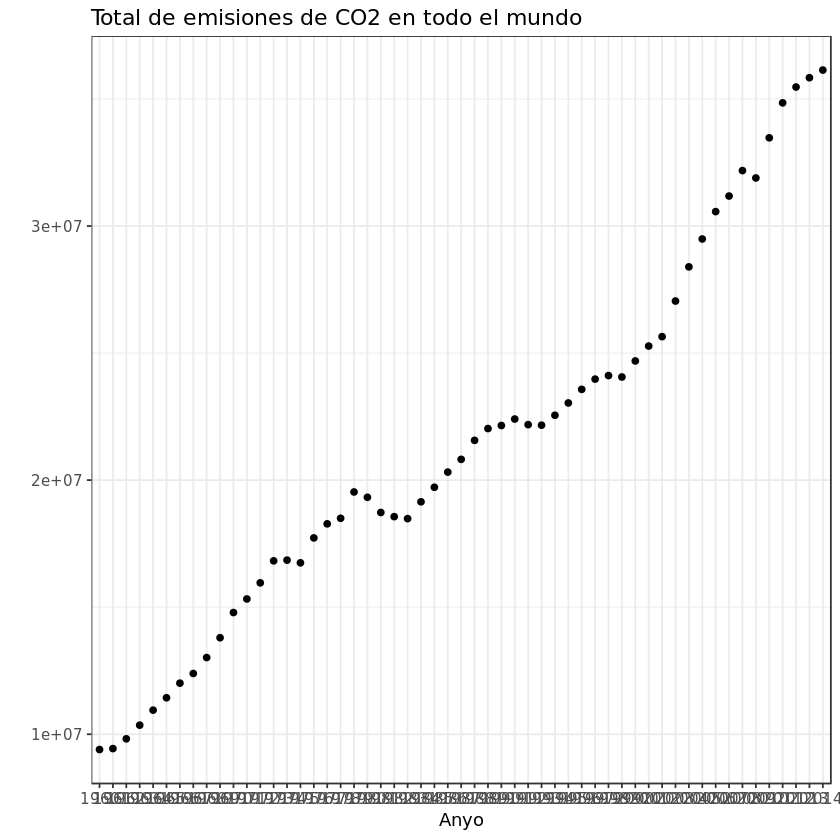

In [66]:
realCountryData<-subset(countryData,Region=="") #Nos quedamos solo con las regiones. Son aquellos que tienen el campo región vacío
names(realCountryData) <- c("Country.Code", "Region", "IncomeGroup", "SpecialNotes", "TableName") # Ponemos nombres a las columnas
paisesRegiones<-realCountryData[,c("Country.Code", "Region")] # Nos quedamos con los países y la región

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960":"2014")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Indicator.Code == 'EN.ATM.CO2E.KT', ] # Filtramos por el indicador

tmpSolucion<-merge(paisesRegiones, productores, by = "Country.Code") # Mezclamos las dos listas
solucion<-tmpSolucion[tmpSolucion$Country.Code == "WLD", ]

require(reshape2)
tmpSolu <- melt(solucion)
solucionFinal <- tmpSolu[,c("Country.Code", "variable", "value")]
colnames(solucionFinal)<- c("Cod.Pais", "Anyo", "Valor") # Cambiamos nombre de las columnas.

library(ggplot2)
model<-lm(data=solucionFinal,Valor~Anyo)
solucionFinal$predicted<-predict(model,solucionFinal)

ggplot(data=solucionFinal,aes(x=Anyo))+
    geom_point(aes(y=Valor))+
    geom_line(aes(y=predicted),color="blue")+
    theme_bw()+xlab("Anyo")+ylab("")+ggtitle("Total de emisiones de CO2 en todo el mundo")


In [67]:
polinomio3 <- lm(solucionFinal$Anyo ~ poly(solucionFinal$Valor, 3, raw=TRUE))
polinomio3
polinomio10 <- lm(solucionFinal$Anyo ~ poly(solucionFinal$Valor, 10, raw=TRUE))
polinomio10

Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"


Call:
lm(formula = solucionFinal$Anyo ~ poly(solucionFinal$Valor, 3, 
    raw = TRUE))

Coefficients:
                              (Intercept)  
                                9.647e+00  
poly(solucionFinal$Valor, 3, raw = TRUE)1  
                               -3.116e-06  
poly(solucionFinal$Valor, 3, raw = TRUE)2  
                                2.913e-13  
poly(solucionFinal$Valor, 3, raw = TRUE)3  
                               -4.779e-21  


Warning message in model.response(mf, "numeric"):
"using type = "numeric" with a factor response will be ignored"Warning message in Ops.factor(y, z$residuals):
"'-' not meaningful for factors"


Call:
lm(formula = solucionFinal$Anyo ~ poly(solucionFinal$Valor, 10, 
    raw = TRUE))

Coefficients:
                                (Intercept)  
                                  1.209e+04  
 poly(solucionFinal$Valor, 10, raw = TRUE)1  
                                 -6.744e-03  
 poly(solucionFinal$Valor, 10, raw = TRUE)2  
                                  1.646e-09  
 poly(solucionFinal$Valor, 10, raw = TRUE)3  
                                 -2.317e-16  
 poly(solucionFinal$Valor, 10, raw = TRUE)4  
                                  2.087e-23  
 poly(solucionFinal$Valor, 10, raw = TRUE)5  
                                 -1.258e-30  
 poly(solucionFinal$Valor, 10, raw = TRUE)6  
                                  5.144e-38  
 poly(solucionFinal$Valor, 10, raw = TRUE)7  
                                 -1.411e-45  
 poly(solucionFinal$Valor, 10, raw = TRUE)8  
                                  2.485e-53  
 poly(solucionFinal$Valor, 10, raw = TRUE)9  
                      

Using Country.Code as id variables


[1] "El valor predicho por el modelo lineal es:"


1 
4.882613

[1] "El valor predicho por el polinomio de grado 3 es:"


1 
6.402475

[1] "El valor predicho por eel polinomio de grado 10 es:"


1 
14.02486

Warning message:
"Removed 3 rows containing missing values (geom_path)."

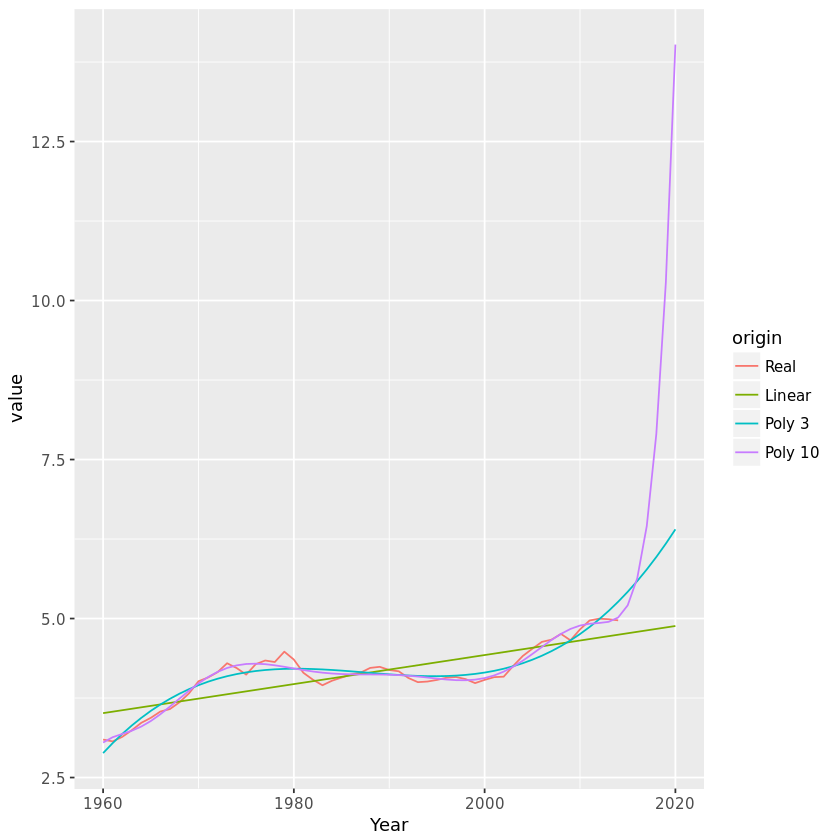

In [68]:
coe2ktwld<-subset(databank,Indicator.Code=="EN.ATM.CO2E.PC" & Country.Code=="WLD") 
yearCols<-5:(ncol(databank)-1)
coe2ktwld<-coe2ktwld[,c(2,yearCols)]
coe2ktwld<-melt(coe2ktwld)
coe2ktwld[,"variable"]<-as.numeric(as.character(coe2ktwld[,"variable"]))
names(coe2ktwld)<-c("Country","Year","value")

model1<-lm(data=coe2ktwld,formula=value~Year)
print("El valor predicho por el modelo lineal es:")
predict(model1,data.frame(Year=2020))

model3<-lm(data=coe2ktwld,formula=value~poly(Year,3))
print("El valor predicho por el polinomio de grado 3 es:")
predict(model3,data.frame(Year=2020))

model10<-lm(data=coe2ktwld,formula=value~poly(Year,10))
print("El valor predicho por eel polinomio de grado 10 es:")
predict(model10,data.frame(Year=2020))

coe2ktwldpred<-data.frame(origin="Real",Year=coe2ktwld$Year,value=coe2ktwld$value)

years<-1960:2020
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Linear",Year=years,value=predict(model1,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 3",Year=years,value=predict(model3,data.frame(Year=years))))
coe2ktwldpred<-rbind(coe2ktwldpred,data.frame(origin="Poly 10",Year=years,value=predict(model10,data.frame(Year=years))))

ggplot(data=coe2ktwldpred,aes(x=Year,y=value,color=origin))+geom_line()#+ylim(c(0.9e7,5e7))

## Nivel de CO2

En esta parte vamos a trabajar con el nivel medio de CO2 medido por el NOAA en Manuna Loa (Hawai) desde 1968.

In [69]:
co2ppm<-read.csv("./datos/co2_mm_mlo.txt",skip=73,sep="",header = F, 
                 col.names= c("year","month","date","average","interpolated","trend","days"))

co2ppm
library("ggplot2")
ejDispersionCO2<-co2ppm[,c("date","interpolated")]

year,month,date,average,interpolated,trend,days
1958,4,1958.292,317.45,317.45,315.29,-1
1958,5,1958.375,317.50,317.50,314.71,-1
1958,6,1958.458,-99.99,317.10,314.85,-1
1958,7,1958.542,315.86,315.86,314.98,-1
1958,8,1958.625,314.93,314.93,315.94,-1
1958,9,1958.708,313.20,313.20,315.91,-1
1958,10,1958.792,-99.99,312.66,315.61,-1
1958,11,1958.875,313.33,313.33,315.31,-1
1958,12,1958.958,314.67,314.67,315.61,-1
1959,1,1959.042,315.62,315.62,315.70,-1


Representa el diagrama de dispersión entre:
* CO2 medido en la atmósfera (co2ppm\$interpolated)
* CO2 emitido por todos los países (databank con Indicator.Code=="EN.ATM.CO2E.KT" y Country.Code=="WLD"?

¿Cual es su correlación?


Nota: 

* Los valores en co2ppm vienen en meses, habrá que agregarlos, calcular la media anual a partir de los meses para así poder hacer la correlación con databank.
* Los valores en databank vienen en columnas, habrá que pasarlos a filas utilizando la función *melt*.

Using Indicator.Code as id variables
Warning message:
"Removed 3 rows containing missing values (geom_point)."

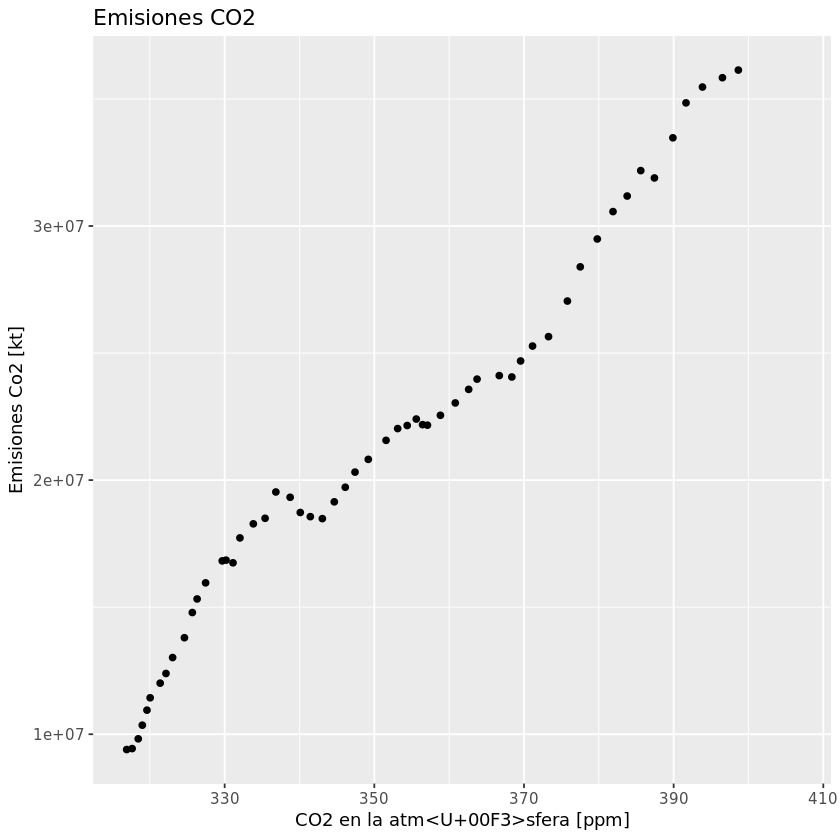

In [132]:
#co2ppm
co2ppm[["date"]] <- NULL
co2ppm[["days"]] <- NULL

yearlyco2ppm<-aggregate(interpolated ~ year, data = co2ppm, mean)

#########
realCountryData<-subset(countryData,Region!="") #Nos quedamos solo con los países. Son aquellos que NO tienen el campo región vacío
names(realCountryData) <- c("Country.Code", "Region", "IncomeGroup", "SpecialNotes", "TableName") # Ponemos nombres a las columnas
paisesRegiones<-realCountryData[,c("Country.Code", "Region")] # Nos quedamos con los países y la región

tempProductores<-databank[,c("Country.Name", "Country.Code", "Indicator.Code", "1960":"2017")] # Seleccionamos consultas que nos interesan
productores<-tempProductores[tempProductores$Country.Code == 'WLD' & tempProductores$Indicator.Code == 'EN.ATM.CO2E.KT', , ] # Filtramos por el indicador
productores<-productores[,c("Indicator.Code", "1960":"2017")]

produc<-melt(productores) # Cambiamos filas por columnas
produc$Indicator.Code<-NULL # Quitamos una columna
colnames(produc)[1] <- paste0("year") # cambiamos el nombre de la columna para que sea igual

solucionCO2ppm<-merge(yearlyco2ppm, produc, by = "year") # Mezclamos las dos listas

ggplot(data=solucionCO2ppm, aes(x=interpolated, y=value)) + geom_point() + xlab ("CO2 en la atmósfera [ppm]") + ylab ("Emisiones Co2 [kt]") + ggtitle ("Emisiones CO2")

Calcular la matriz de correlación de las siguientes variables:
* Cantidad de CO2 en la atmósfera
* Emisiones totales CO2 en la atmósfera
* Temperatura mínima en praga (columna EMNT).

In [139]:
weatherPragaTempMin<-read.csv("./datos/EZE00100082.csv", sep = ",")
weatherPraga<-weatherPragaTempMin[,c("DATE","EMNT")]
#head(weatherPraga)
#head(solucionCO2ppm)

#m<-merge(co2tot,weatherPraga[,c("DATE","EMNT")],by.x="year",by.y="DATE")[,c("co2.atm","co2.emission","EMNT")]
m<-merge(solucionCO2ppm,weatherPraga[,c("DATE","EMNT")],by.x="year",by.y="DATE")[,c("interpolated","value","EMNT")]
cor(m)

,interpolated,value,EMNT
interpolated,1.0000000,0.9703198,0.1783153
value,0.9703198,1.0000000,0.2254552
EMNT,0.1783153,0.2254552,1.0000000
